# Importing Necessary Libraries

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
data = pd.read_csv('News.csv',index_col=0)
data.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


# Data Preprocessing

In [57]:
data.shape

(44919, 5)

In [58]:
data.isnull().sum()

title       0
text        0
subject    21
date       21
class       0
dtype: int64

In [59]:
data[data.isnull().any(axis=1)]

,title,text,subject,date,class
9731,ANTI-AMERICAN GEORGE SOROS Locks Arms With NFL...,We just discovered another reason NOT to suppo...,NaN,NaN,0
12407,WOW! AMERICA IS UNDER ATTACK By These 187 Orga...,There have been many articles written about Ge...,NaN,NaN,0
13362,A MUST READ! Here’s Why Voting For DONALD TRUM...,This is a must read for anyone who s undecided...,NaN,NaN,0
17852,ANTI-AMERICAN GEORGE SOROS Locks Arms With NFL...,We just discovered another reason NOT to suppo...,NaN,NaN,0
19625,WOW! AMERICA IS UNDER ATTACK By These 187 Orga...,There have been many articles written about Ge...,NaN,NaN,0
21925,YEAR IN REVIEW: 2017 Top Ten Conspiracies,Patrick Henningsen and Shawn Helton 21st Centu...,NaN,NaN,0
21935,CLOAKED IN CONSPIRACY: Overview of JFK Files R...,Shawn Helton 21st Century WireSince late Octob...,NaN,NaN,0
21985,The Las Vegas Mass Shooting – More to the Stor...,Shawn Helton 21st Century WireAlthough many ar...,NaN,NaN,0
22021,What is The Deep State?,One of the ancillary benefits of Donald Trump ...,NaN,NaN,0
22312,MEDIA TRIPWIRE? Ping Pong Pizza Conspiracy Pro...,Funny how secrets travel. I d start to believ...,NaN,NaN,0


In [60]:
# Drop the title, Subject, Date columns, that we don't need them
data = data.drop(["title", "subject","date"], axis = 1)
data

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
21412,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
21413,"LONDON (Reuters) - LexisNexis, a provider of l...",1
21414,MINSK (Reuters) - In the shadow of disused Sov...,1
21415,MOSCOW (Reuters) - Vatican Secretary of State ...,1


In [61]:
# Shuffle the Dataset to prevent Bias
data = data.sample(frac=1)
data.reset_index(inplace=True)
data.drop(['index'],axis=1,inplace=True)
data

,text,class
0,WASHINGTON (Reuters) - U.S. President Donald T...,1
1,"Just about every day, Rush Limbaugh s big fat ...",0
2,President Trump is once again proving that he ...,0
3,21st Century Wire says This week s documentary...,0
4,The Watergate scandal is considered one of the...,0
...,...,...
44914,BRUSSELS (Reuters) - Former Catalan leader Car...,1
44915,After only serving less than 4 years on the be...,0
44916,Donald Trump s plan to create a national regis...,0
44917,WASHINGTON (Reuters) - U.S. House of Represent...,1


<Axes: xlabel='class', ylabel='count'>

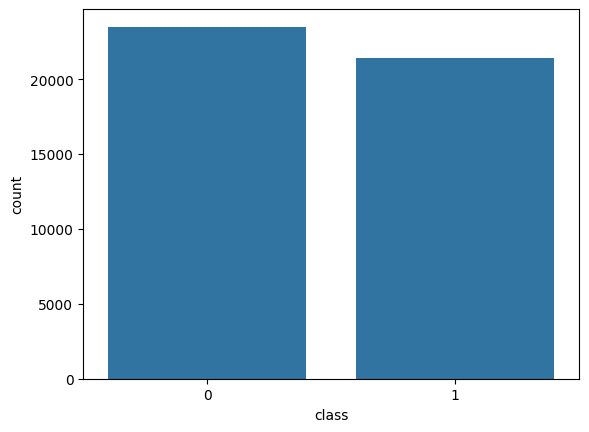

In [62]:
sns.countplot(data=data,x=data['class'],order=data['class'].value_counts().index)

In [63]:
from tqdm import tqdm
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vijju\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vijju\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [64]:
def preprocess_text(text_data):
    preprocess_text = []
    for sentence in tqdm(text_data):
        sentence = re.sub(r'[^\w\s]','',sentence)
        preprocess_text.append(" ".join(token.lower() 
                               for token in str(sentence).split()
                               if token not in stopwords.words('english')
                               ))
    return preprocess_text

In [65]:
# preprocessed_review = preprocess_text(data.text.values)

100%|██████████| 44919/44919 [1:26:35<00:00,  8.65it/s]  


In [66]:
data['text'] = preprocessed_review

# Word Cloud Visualization

In [67]:
data

,text,class
0,washington reuters us president donald trump s...,1
1,just every day rush limbaugh big fat lies syst...,0
2,president trump proving running white house va...,0
3,21st century wire says this week documentary f...,0
4,the watergate scandal considered one worst pol...,0
...,...,...
44914,brussels reuters former catalan leader carles ...,1
44915,after serving less 4 years bench barack obama ...,0
44916,donald trump plan create national registry mus...,0
44917,washington reuters us house representatives sp...,1


In [68]:
print(data['class'].value_counts())
print(data[data['class'] == 1].head())

class
0    23502
1    21417
Name: count, dtype: int64
                                                 text  class
0   washington reuters us president donald trump s...      1
6   reuters the mayor stockton california arrested...      1
9   berlin reuters germany foreign minister siegma...      1
12  berlin reuters germans vote sunday parliamenta...      1
17  baghdad reuters iraqi forces launch offensive ...      1


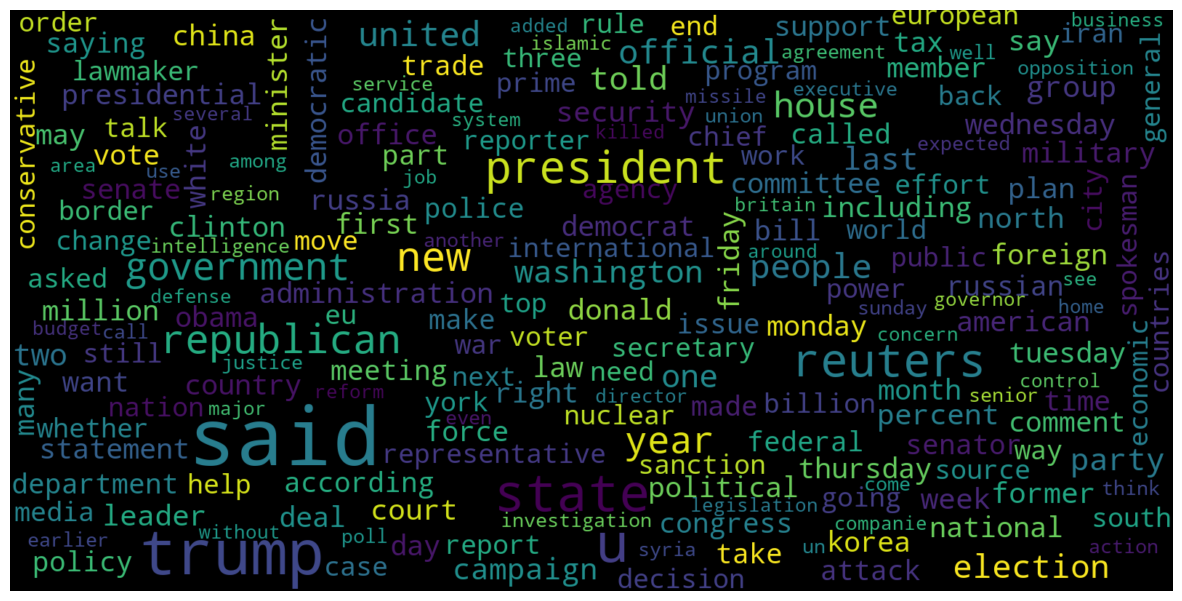

In [69]:
# Real
consolidated = ' '.join(
    word for word in data['text'][data['class'] == 1].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

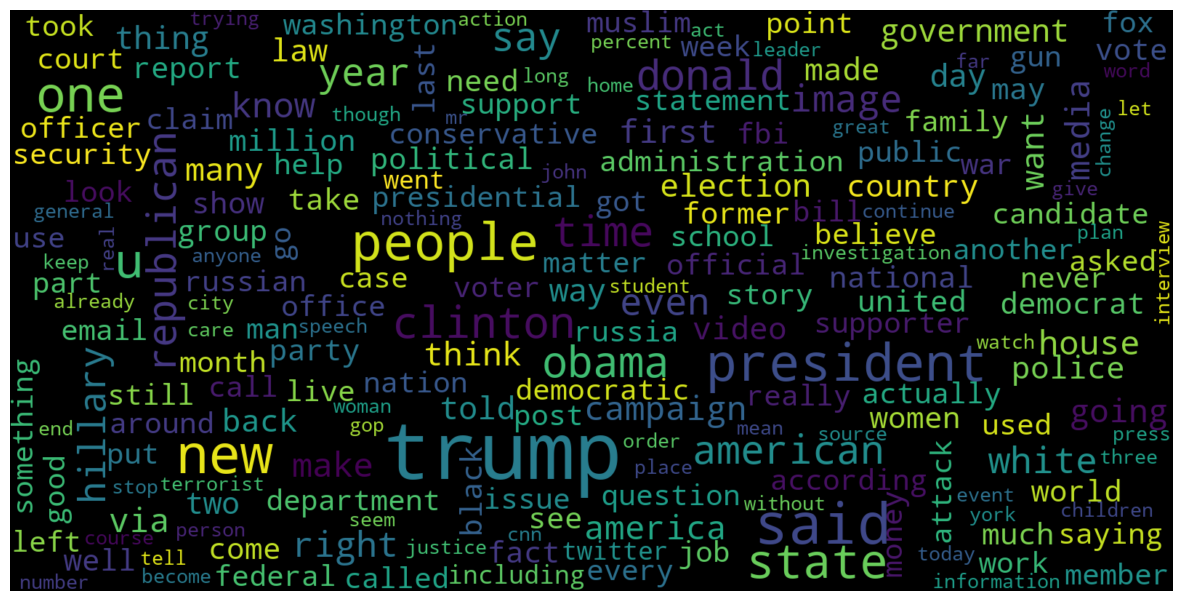

In [70]:
consolidated = ' '.join(
    word for word in data['text'][data['class'] == 0].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

<Axes: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

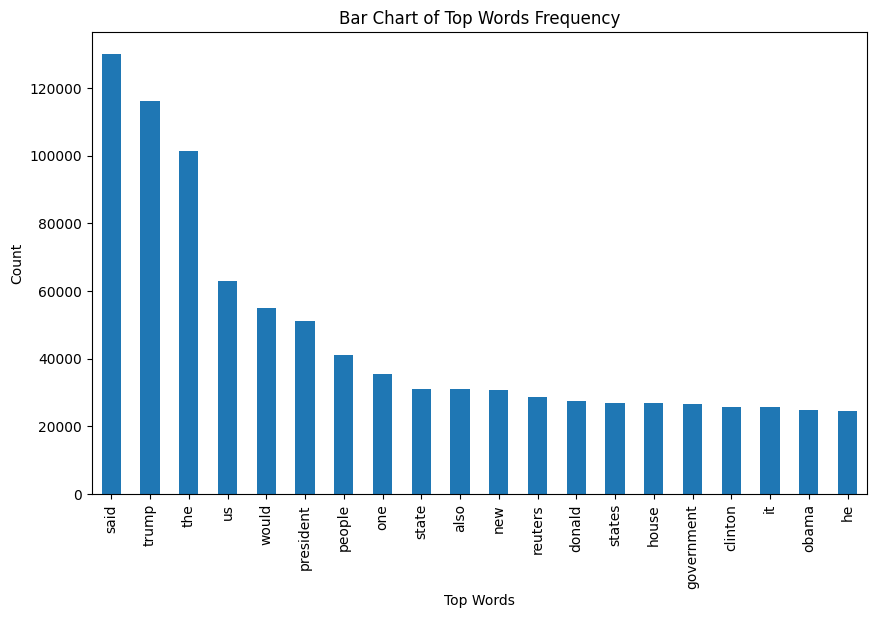

In [71]:
from sklearn.feature_extraction.text import CountVectorizer


def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1],
                        reverse=True)
    return words_freq[:n]

    


common_words = get_top_n_words(data['text'], 20)
df1 = pd.DataFrame(common_words, columns=['Review', 'count'])

df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel="Top Words",
    ylabel="Count",
    title="Bar Chart of Top Words Frequency"
)

# Converting text into vectors

In [74]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [75]:
# Splitting the data
(X_train,X_test,y_train,y_test) = train_test_split(data['text'],data['class'],test_size=0.25)

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [78]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Model Training and Evaluation

In [90]:
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [81]:
# Logistic regression
model1 = LogisticRegression()

In [82]:
model1.fit(X_train,y_train)

LogisticRegression()

In [83]:
pred1 = model1.predict(X_test)

In [84]:
# Evaluation of Logistic regressor
print('accuracy_score:',accuracy_score(y_test,pred1))

accuracy_score: 0.989047195013357


In [85]:
# Decision Tree classifier
model = DecisionTreeClassifier()

In [86]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [87]:
pred2 = model.predict(X_test)

In [88]:
# Evaluation of Decision Tree classifier
print('accuracy_score:',accuracy_score(y_test,pred2))

accuracy_score: 0.9972395369545859


In [92]:
with open('model.pkl','wb') as f:
    pickle.dump(model,f)

In [94]:
with open('tfidf_vectorizer.pkl','wb') as f:
    pickle.dump(vectorizer,f)

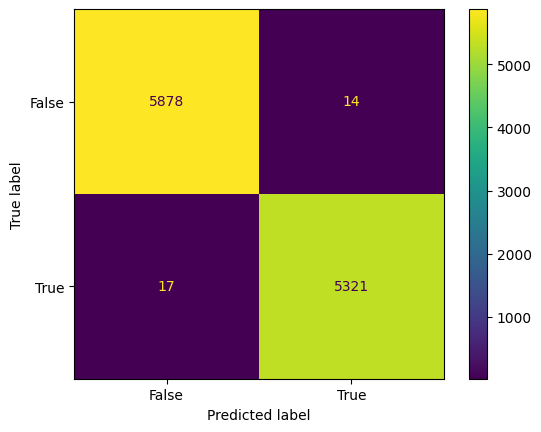

In [98]:
# Confusion Matrix for Decision Tree Classifier
cm = confusion_matrix(y_test,pred2)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,
                                    display_labels=[False,True])
cm_display.plot()
plt.show()

In [ ]:
new_article = data.text[data['class']==1]

'washington reuters us president donald trump said tuesday would surprised iran compliance nuclear deal recertification comes three months according interview wall street journal well talk subject 90 days i would surprised compliance told journal the president must certify congress every three months iran complying 2015 nuclear deal'

In [ ]:
# Example new article
# new_article = "Trump Just Admitted He Knew Flynn Lied To The FBI Before He Asked Comey To Drop The Investigation,Donald Trump really should have taken his staffers  advise and not tweeted about former national security adviser Michael Flynn because the former reality show star just implicated himself. I had to fire General Flynn because he lied to the Vice President and the FBI,  Trump tweeted.  He has pled guilty to those lies. It is a shame because his actions during the transition were lawful. There was nothing to hide! I had to fire General Flynn because he lied to the Vice President and the FBI. He has pled guilty to those lies. It is a shame because his actions during the transition were lawful. There was nothing to hide!  Donald J. Trump (@realDonaldTrump) December 2, 2017 Oh my god, he just admitted to obstruction of justice,  former Justice Department spokesman Matthew Miller tweeted.  If Trump knew Flynn lied to the FBI when he asked Comey to let it go, then there is your case. Oh my god, he just admitted to obstruction of justice. If Trump knew Flynn lied to the FBI when he asked Comey to let it go, then there is your case. https://t.co/c6Wtd0TfzW  Matthew Miller (@matthewamiller) December 2, 2017However, last February, then-White House press secretary Sean Spicer said Trump asked Flynn to resign from his position because of  eroding trust. There is not a legal issue but rather a trust issue,  he said at the time.After Flynn left, Trump defended him, calling the disgraced former national security adviser a  wonderful man. I think he s been treated very, very unfairly by the media   as I call it, the fake media, in many cases,  Trump said in February.  I think it s really a sad thing he was treated so badly. When Flynn resigned, he apologized for giving an inaccurate assessment of his conversation with Russian Ambassador Sergey Kislyak to Mike Pence, who, at the time, was the vice-president elect.Pence then said that Flynn had not discussed sanctions with Kislyak.The day after Flynn resigned, Trump, according to then-FBI Director James Comey, asked him to  let go  of an investigation into Flynn.Trump admitted that he knew Flynn lied to the FBI, then he asked Comey to drop the investigation. Shorter version: Trump just tripped over his own little d*ck and presented exhibit A for trial because he obstructed justice.Photo by Steve Pope/Getty Images.,News,December 2, 2017"

def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    return " ".join(token.lower() for token in str(text).split() if token not in stopwords.words('english'))

cleaned = clean_text(new_article[0])

# Vectorize
X_new = vectorizer.transform([cleaned])

# Predict
prediction = model.predict(X_new)

# Interpret result
if prediction[0] == 1:
    print("This news is REAL.")
else:
    print("This news is FAKE.")

This news is REAL.
